In [7]:
# generate data file
import numpy as np
import torch
import matplotlib.pyplot as plt
np.random.seed(12321)

In [8]:
class NSeriesMClasses:
    """create n series with 10 classes.  This will be a dataset for time series classification"""
    
    def __init__(self, samples, length, classes):
        self.samples = samples
        self.length = length
        self.classes = classes
        self.means = np.random.uniform(-2, 2, self.classes)
        self.stdevs = np.random.uniform(0, 1, self.classes)
        self.amps = np.random.uniform(0.5, 6, self.classes)
        self.pi_rads = np.random.randint(2, 8, self.classes)
        
    def create_n_series(self):
        data = []
        targets = []
        for i in range(self.samples):
            val = np.random.randint(0,self.classes)
            x = np.random.normal(self.means[val], self.stdevs[val], self.length) + \
                np.random.normal(0, self.amps[val], self.length) * \
                np.sin(np.linspace(0, self.pi_rads[val]*np.pi, self.length))
            data.append(x)
            targets.append(val)
        n_series = np.array(data)
        targets = np.array(targets)
        
        return n_series, targets    

In [9]:
c = NSeriesMClasses(samples=10000, length=100, classes = 10)
X, y = c.create_n_series()
torch.save(X, "X_m_classes.pt")
torch.save(y, "y_m_classes.pt")

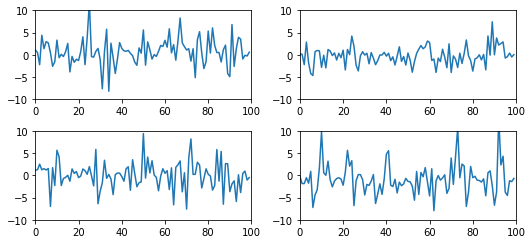

In [10]:
# Each plotted on the same axis, the graphs are very distinguishable from
# one another
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax1 = plt.subplot(2, 2, 1)
ax1.set_xlim(left=0, right=100)
ax1.set_ylim(bottom=-10, top=10)
ax1.plot(X[0])
ax2 = plt.subplot(2, 2, 2, sharey=ax1, sharex=ax1)
ax2.plot(X[1])
ax3 = plt.subplot(2, 2, 4, sharey=ax1, sharex=ax1)
ax3.plot(X[2])
ax4 = plt.subplot(2, 2, 3, sharey=ax1, sharex=ax1)
ax4.plot(X[3])
plt.show()